# Analyzing StarWars Survey Response Data

## Reading in the data from csv file

In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [2]:
star_wars.head(10)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             
5    3292719380                                                Yes             
6    3292684787                                                Yes             
7    3292663732                                                Yes             
8    3292654043                                                Yes             
9    3292640424                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                Yes                      
1                                                NaN                      
2                                                 No                      
3                                                Yes                      
4                                                Yes                      
5                                                Yes                      
6                                                Yes                      
7                                                Yes                      
8                                                Yes                      
9                                                 No                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1                                                NaN                                    
2           Star Wars: Episode I  The Phantom Menace                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    
6           Star Wars: Episode I  The Phantom Menace                                    
7           Star Wars: Episode I  The Phantom Menace                                    
8           Star Wars: Episode I  The Phantom Menace                                    
9                                                NaN                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1                                          NaN   
2  Star Wars: Episode II  Attack of the Clones   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   
6  Star Wars: Episode II  Attack of the Clones   
7  Star Wars: Episode II  Attack of the Clones   
8  Star Wars: Episode II  Attack of the Clones   
9  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1                                          NaN   
2  Star Wars: Episode III  Revenge of the Sith   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   
6  Star Wars: Episode III  Revenge of the Sith   
7  Star Wars: Episode III  Revenge of the Sith   
8  Star Wars: Episode III  Revenge of the Sith   
9                                          NaN   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1                                NaN   
2                                NaN   
3  Star Wars: Episode IV  A New Hope   
4  Star Wars: 

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
mapping_bool = {'Yes':True, 
                'No':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping_bool)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapping_bool)

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
import numpy as np
movies_mapping = {'Star Wars: Episode I  The Phantom Menace':True,
         'Star Wars: Episode II  Attack of the Clones':True,
         'Star Wars: Episode III  Revenge of the Sith':True,
         'Star Wars: Episode IV  A New Hope':True,
         'Star Wars: Episode V The Empire Strikes Back':True,
         'Star Wars: Episode VI Return of the Jedi':True,
                 np.nan:False}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movies_mapping)

In [7]:
cols_mapping = {}
i=0
new_names = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
for col in star_wars.columns[3:9]:
    cols_mapping[col] = new_names[i]
    i+=1
star_wars.rename(columns=cols_mapping, inplace=True)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you 

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
cols_mapping2 = {}
new_names2 = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
i=0
for col in star_wars.columns[9:15]:
    cols_mapping2[col] = new_names2[i]
    i+=1
star_wars.rename(columns=cols_mapping2, inplace=True)

In [10]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

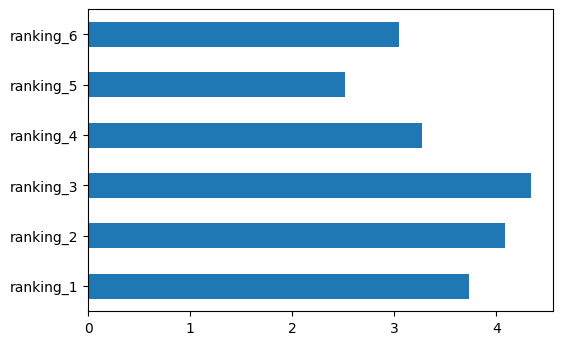

In [11]:
%matplotlib inline
means = star_wars[star_wars.columns[9:15]].mean()
means.plot.barh()

From the bar plot above, it is evident that 5th starwars movie is the most liked. 

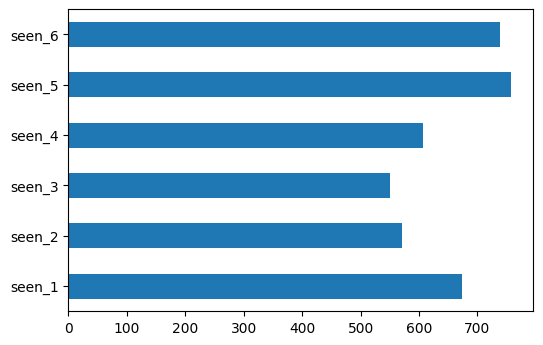

In [12]:
sums = star_wars.iloc[:,3:9].sum()
sums.plot(kind='barh')

The number of times a movie is seen by people agrees with the ranking of movies as the 5th episode is most watched followed by the 6th series.

In [17]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']= star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].astype(bool)
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']]
not_fans = star_wars[~(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'])]

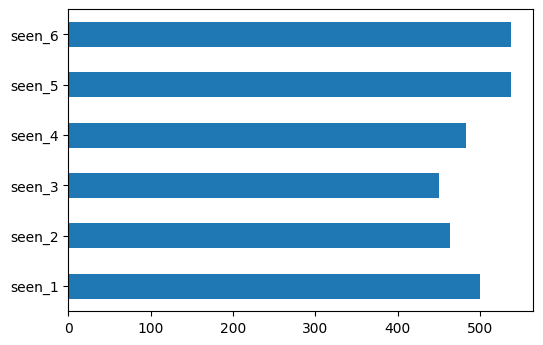

In [18]:
sums_fans = fans.iloc[:,3:9].sum()
sums_fans.plot(kind='barh')

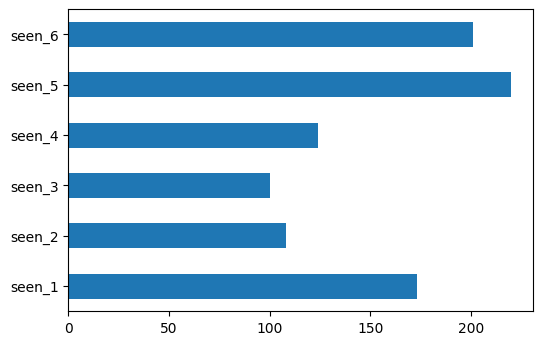

In [19]:
sums_not = not_fans.iloc[:,3:9].sum()
sums_not.plot(kind='barh')

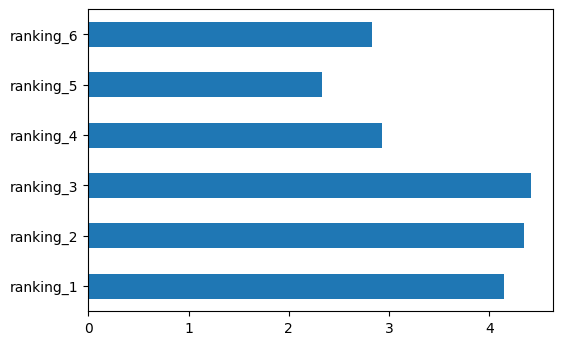

In [20]:
means_fans = fans[fans.columns[9:15]].mean()
means_fans.plot.barh()

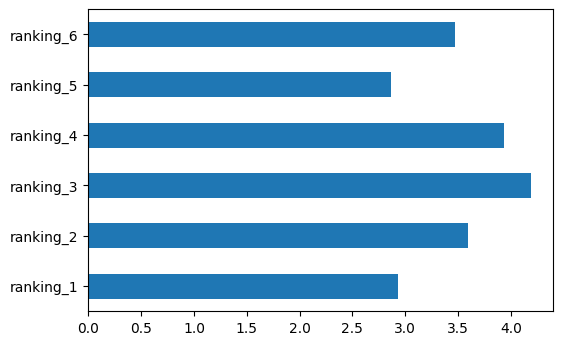

In [21]:
means_not = not_fans[not_fans.columns[9:15]].mean()
means_not.plot.barh()

Interesting, people who are not fans have mostly watched episodes 5 and 6, but did not like the 6th one as much. 